In [14]:
#Import All Important Libraries
import librosa
# from pydub import AudioSegment
import subprocess
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
#function for extracting mfcc, chroma, and mel features from sound file
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma:
      stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
      mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      result=np.hstack((result, mfccs))
    if chroma:
      chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
      result=np.hstack((result, chroma))
    if mel:
      mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
      result=np.hstack((result, mel))
  return result

In [16]:
#Define the motions dictionary
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

#Emotions we want to observe
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']

In [17]:
#Load the data and extract features for each sound file
def load_data(test_size = 0.3):
    x, y = [], []
    print(0)
    for folder in glob.glob('./Datasets/RAVDESS*'):
        # print(0)
        print(folder)
        for file in glob.glob(folder + '/*.wav'):
            print(file)
            file_name = os.path.basename(file)
            emotion = emotions[file_name.split('-')[2]]
            if emotion not in observed_emotions:
                pass
            feature = extract_feature(file, mfcc = True, chroma = True, mel = True)
            x.append(feature)
            y.append(emotion)
    return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)

In [18]:
x_train,x_test,y_train,y_test=load_data(test_size=0.3)

0
./Datasets/RAVDESS
./Datasets/RAVDESS/03-02-03-02-02-01-15.wav
./Datasets/RAVDESS/03-02-04-02-01-01-02.wav
./Datasets/RAVDESS/03-02-06-01-01-02-21.wav
./Datasets/RAVDESS/03-02-06-02-02-02-10.wav
./Datasets/RAVDESS/03-02-06-02-02-01-22.wav
./Datasets/RAVDESS/03-02-02-01-02-01-15.wav
./Datasets/RAVDESS/03-02-04-02-02-02-07.wav
./Datasets/RAVDESS/03-02-02-01-01-02-23.wav
./Datasets/RAVDESS/03-02-02-01-02-02-17.wav
./Datasets/RAVDESS/03-02-06-02-02-02-23.wav
./Datasets/RAVDESS/03-02-03-02-01-01-08.wav
./Datasets/RAVDESS/03-02-03-01-02-02-14.wav
./Datasets/RAVDESS/03-02-03-01-02-02-05.wav
./Datasets/RAVDESS/03-02-02-01-02-02-01.wav
./Datasets/RAVDESS/03-02-06-01-02-02-16.wav
./Datasets/RAVDESS/03-02-03-01-02-02-22.wav
./Datasets/RAVDESS/03-02-06-01-02-01-15.wav
./Datasets/RAVDESS/03-02-03-01-01-01-22.wav
./Datasets/RAVDESS/03-02-06-01-02-02-01.wav
./Datasets/RAVDESS/03-02-06-02-02-02-14.wav
./Datasets/RAVDESS/03-02-05-01-01-02-08.wav
./Datasets/RAVDESS/03-02-06-02-01-01-05.wav
./Datasets/

In [19]:
#Shape of train and test set and Number of features extracted
print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

(707, 304)
Features extracted: 180


In [20]:
#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (1000,), learning_rate = 'adaptive', max_iter = 500)

In [21]:
history=model.fit(x_train, y_train)

In [22]:
history

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(1000,),
              learning_rate='adaptive', max_iter=500)

In [23]:
#Predict for the test set
y_pred = model.predict(x_test)

In [24]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.33%


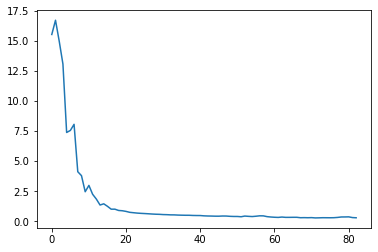

In [25]:
loss_plot=model.loss_curve_
plt.plot(loss_plot)
plt.show()

In [26]:
# file = './test/agk.mp3'
# emotion = "anger"
# opfile = "./test/test_anger_4.wav"
# if file[-3:] != "wav":
#     cmd = f"ffmpeg -i {file} -acodec pcm_s16le -ac 1 -ar 48000 {opfile} -y"
#     process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
#     output, error = process.communicate()
# else:
#     opfile = file
# file_name = os.path.basename(opfile)
# # emotion = emotions[file_name.split('-')[2]]
# x = [extract_feature(opfile, True, True, True)]
# print(model.predict(x), emotion)